**Work presented to PCS5024 - Statistical Learning as part of its evaluation process - June/2022**

This script was adapted by me, Vinicius Bueno de Moraes, based on work available [Here](https://github.com/Prianca25/Machine-Learning/blob/master/Adult%20UCI%20Dataset%20Analysis.ipynb).

Additionally, the following references were used:

*   https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
*   https://www.springboard.com/blog/data-analytics/naive-bayes-classification/
*   https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

**Load Libraries**


In [ ]:
#basics
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
#models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [ ]:
import warnings 
warnings.filterwarnings('ignore')


**1) Get the dataset Adult (either in the UCI Repository or in Kaggle).**

**Import necessary files**

In [ ]:
df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**2) Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn).**

In [ ]:
print('Dimension of Data Table: ')
df.shape

Dimension of Data Table: 


(48842, 15)

In [ ]:
print('Null data for each column: ')
df.isnull().sum()

Null data for each column: 


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
print('Unique data for each column: ')
df.nunique()

Unique data for each column: 


age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [ ]:
print('Statisctis about Dataset: ')
df.describe().T

Statisctis about Dataset: 


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


**2) Select features, discretize numerical features, handle missing data.**

**Viewing all Dataset**

In [ ]:
for i in df.columns:
  print(i + ' analysis: ')
  print(df[i].value_counts())
  print('')

age analysis: 
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

workclass analysis: 
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

fnlwgt analysis: 
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64

education analysis: 
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th 

**2) Filling null Values of all features with Mode value.**

In [ ]:
for i in df.columns:
  df[i] = df[i].replace('?', df[i].mode()[0])

df.head(10) #New Dataset withou null values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**Labelling features - for Education, Marital Status and Income**


In [ ]:
#education
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'shool')
df.education = df.education.replace('HS-grad', 'high-school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

df.education.value_counts()

high-school    15784
higher         15374
undergrad       8025
shool           6408
grad            2657
doc              594
Name: education, dtype: int64

In [ ]:
#marital status
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].replace(['Never-married'], 'not-married')
df['marital-status'] = df['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'other')

df['marital-status'].value_counts()

married        22416
not-married    16117
other          10309
Name: marital-status, dtype: int64

In [ ]:
#income (used for all algorithms)
df.income = df.income.replace('<=50k', 0)
df.income = df.income.replace('>50k', 1)

df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,shool,7,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,high-school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,higher,10,not-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


**Discretize numerical features**

In [ ]:
dfDisc = df.copy()
dfDisc = dfDisc.apply(LabelEncoder().fit_transform)
dfDisc.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,4,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,3,11,0,10,0,4,1,0,0,39,38,1
3,27,3,11201,3,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,3,9,1,9,3,4,0,0,0,29,38,0


**Correlation between variables/features**

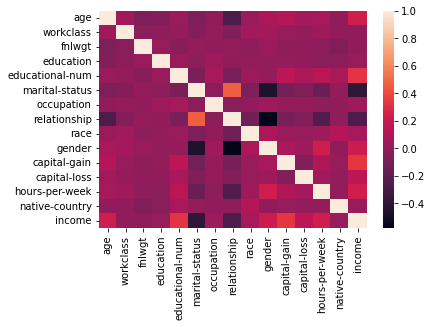

In [ ]:
sns.heatmap(dfDisc.corr(), annot = False)

**Fitting input data to apply to classifiers / Normalization**

In [ ]:
ss = StandardScaler().fit(dfDisc.drop('income', axis = 1))
X = ss.transform(dfDisc.drop('income', axis = 1))
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

**3) Build a kNN classifier to predict class variable ">50k" (that is, whether person gets more than US$50k/year or not). Select the hyperparameter using cross-validation; test the final classifier using a holdout dataset.**

**kNN Classifier**

In [ ]:
#define main hyperparameters
parametersKNN = {'n_neighbors' : list(range(20, 30))}
kNNTrain = KNeighborsClassifier()
modelKNNTrain = GridSearchCV(kNNTrain, parametersKNN, cv = 5)
bestModelKNN = modelKNNTrain.fit(X_train, y_train)

k = bestModelKNN.best_estimator_.get_params()['n_neighbors']

print('Results of kNN Classifier: \n')
print('n_neighbors =', k)
print('')

#final kNN Classifier
kNN = KNeighborsClassifier(n_neighbors = k)
modelKNN = kNN.fit(X_train, y_train)
predictionKNN = modelKNN.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(kNN.score(X_train, y_train)))
print('Accuracy on test data: {:,.3f}\n'.format(kNN.score(X_test, y_test)))
print(classification_report(y_test, predictionKNN))

Results of kNN Classifier: 

n_neighbors = 24

Accuracy on training data: 0.859
Accuracy on test data: 0.845

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11138
        >50K       0.71      0.60      0.65      3515

    accuracy                           0.85     14653
   macro avg       0.80      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653



**4) Repeat (3) using three other classification techniques (for instance, neural network, classification tree, random forest, boosted trees, SVM, Naive Bayes).**

**Random Forest Classifier**

In [ ]:
#define main hyperparameters
parametersRfc = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300]}
rfcTrain = RandomForestClassifier()
modelRfcTrain = GridSearchCV(rfcTrain, parametersRfc , cv = 5)
bestModelRfc = modelRfcTrain.fit(X_train, y_train)

b = bestModelRfc.best_estimator_.get_params()['bootstrap']
maxd = bestModelRfc.best_estimator_.get_params()['max_depth']
maxf = bestModelRfc.best_estimator_.get_params()['max_features']
nEstimators = bestModelRfc.best_estimator_.get_params()['n_estimators']

print('Results of Random Forest Classifier: \n')
print('bootstrap =', b)
print('max_depth =',  maxd)
print('max_features =', maxf)
print('n_estimators =', nEstimators)
print('')

#final RF Classifier
rfc = RandomForestClassifier(n_estimators = nEstimators, max_depth = maxd, max_features = maxf, bootstrap = b)
modelRfc = rfc.fit(X_train, y_train)
predictionRfc = modelRfc.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy on test data: {:,.3f}\n'.format(rfc.score(X_test, y_test)))
print(classification_report(y_test, predictionRfc))

Results of Random Forest Classifier: 

bootstrap = True
max_depth = 80
max_features = 2
n_estimators = 200

Accuracy on training data: 1.000
Accuracy on test data: 0.857

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     11138
        >50K       0.73      0.64      0.68      3515

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653



**Naive Bayes Classifier**

In [ ]:
#define main hyperparameters
parametersNB = {'var_smoothing': np.logspace(0, -9, num = 100)}
NBTrain = GaussianNB()
modelNBTrain = GridSearchCV(NBTrain, parametersNB, verbose = 1, cv = 5, n_jobs = -1)
bestModelNB = modelNBTrain.fit(X_train, y_train)

v = bestModelNB.best_estimator_.get_params()['var_smoothing']

print('Results of Naive Bayes Classifier: \n')
print('var_smoothing =', v)
print('')

#final NB Classifier
NB = GaussianNB(var_smoothing = v)
modelNB = NB.fit(X_train, y_train)
predictionNB = modelNB.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(NB.score(X_train, y_train)))
print('Accuracy on test data: {:,.3f}\n'.format(NB.score(X_test, y_test)))
print(classification_report(y_test, predictionNB))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Results of Naive Bayes Classifier: 

var_smoothing = 0.1873817422860384

Accuracy on training data: 0.824
Accuracy on test data: 0.825

              precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89     11138
        >50K       0.69      0.49      0.57      3515

    accuracy                           0.82     14653
   macro avg       0.77      0.71      0.73     14653
weighted avg       0.81      0.82      0.81     14653



**SVM Classifier**

In [ ]:
#define main hyperparameters
kernel = 'linear'

print('Results of SVM Classifier: \n')
print('kernel =', kernel)
print('')

#final SVM Classifier
SVM = svm.SVC(kernel = kernel)
modelSVM = SVM.fit(X_train, y_train)
predictionSVM = modelSVM.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(SVM.score(X_train, y_train)))
print('Accuracy on test data: {:,.3f}\n'.format(SVM.score(X_test, y_test)))
print(classification_report(y_test, predictionSVM))

Results of SVM Classifier: 

kernel = linear

Accuracy on training data: 0.840
Accuracy on test data: 0.841

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     11138
        >50K       0.73      0.53      0.62      3515

    accuracy                           0.84     14653
   macro avg       0.80      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653



**5) Present accuracy, precision and recall for the best classifier in (3) and in (4).**

The answer to this item is contained in the previous items, as you can see.

**6) Extra points: repeat (3) using a Multi-Layer Perceptron.**

In [ ]:
#define main hyperparameters
parametersMLP = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}
MLPTrain = MLPClassifier()
modelMLPTrain = GridSearchCV(MLPTrain, parametersMLP, n_jobs=-1, cv=5)
bestModelMLP = modelMLPTrain.fit(X_train, y_train)

hiden = bestModelMLP.best_estimator_.get_params()['hidden_layer_sizes']
act = bestModelMLP.best_estimator_.get_params()['activation']
solver = bestModelMLP.best_estimator_.get_params()['solver']
alpha = bestModelMLP.best_estimator_.get_params()['alpha']
learning = bestModelMLP.best_estimator_.get_params()['learning_rate']

print('Results of MLP Classifier: \n')
print('hidden_layer_sizes =', hiden)
print('activation =', act)
print('solver =', solver)
print('alpha =', alpha)
print('learning_rate =', learning)
print('')

#final MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes = hiden, activation = act, solver = solver, alpha = alpha, learning_rate = learning)
modelMLP = MLP.fit(X_train, y_train)
predictionMLP = modelMLP.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(MLP.score(X_train, y_train)))
print('Accuracy on test data: {:,.3f}\n'.format(MLP.score(X_test, y_test)))
print(classification_report(y_test, predictionMLP))

Results of MLP Classifier: 

hidden_layer_sizes = (10, 30, 10)
activation = tanh
solver = adam
alpha = 0.0001
learning_rate = adaptive

Accuracy on training data: 0.860
Accuracy on test data: 0.856

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     11138
        >50K       0.73      0.63      0.68      3515

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653

